In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
data = pd.read_csv('Wholesale customers data.csv')
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [42]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [43]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [44]:
from sklearn.cross_validation import train_test_split

## Remove Outliers

In [45]:
import itertools

In [79]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

In [125]:
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in data.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))

print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print('Original shape of data:\n', data.shape)
# Processed Data
print('New shape of data:\n', good_data.shape)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicassen':
Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


In [126]:
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


### Implementation: PCA

In [127]:
from sklearn.decomposition import PCA

In [128]:
# TODO: Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [129]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [131]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [132]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.4262810154691084
For n_clusters = 3. The average silhouette_score is : 0.3974234200078323
For n_clusters = 4. The average silhouette_score is : 0.3312459160606664
For n_clusters = 5. The average silhouette_score is : 0.3496074606159664
For n_clusters = 6. The average silhouette_score is : 0.3610848771513077
For n_clusters = 7. The average silhouette_score is : 0.36480120797880017
For n_clusters = 8. The average silhouette_score is : 0.3482680148612843
For n_clusters = 9. The average silhouette_score is : 0.35686229797038943
For n_clusters = 10. The average silhouette_score is : 0.36858334522978686


In [137]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = KMeans(n_clusters=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_

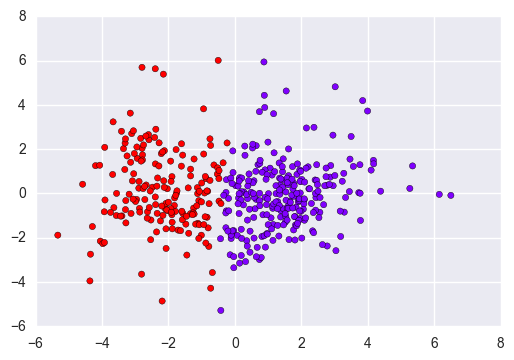

In [147]:
plt.scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1], c=clusterer.labels_, cmap='rainbow')

In [149]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments

In [150]:
true_centers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [153]:
# Clusters' deviation from median
true_centers - data.median()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,363.0,-1730.0,-2278.5,562.0,-522.5,-284.5
Segment 1,-4499.0,4273.0,7348.5,-574.0,3744.5,70.5


In [154]:
# Clusters' deviation from mean
# As you can see, this is not a meaningful comparison for Segment 1 where everything is negative
true_centers - data.mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,-3133.297727,-3899.265909,-5474.277273,-983.931818,-2587.493182,-843.870455
Segment 1,-7995.297727,2103.734091,4152.722727,-2119.931818,1679.506818,-488.870455


In [159]:
# Display the predictions
for i, pred in enumerate(preds):
    print("Data point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 1
Sample point 5 predicted to be in Cluster 1
Sample point 6 predicted to be in Cluster 1
Sample point 7 predicted to be in Cluster 1
Sample point 8 predicted to be in Cluster 1
Sample point 9 predicted to be in Cluster 1
Sample point 10 predicted to be in Cluster 1
Sample point 11 predicted to be in Cluster 0
Sample point 12 predicted to be in Cluster 1
Sample point 13 predicted to be in Cluster 1
Sample point 14 predicted to be in Cluster 1
Sample point 15 predicted to be in Cluster 0
Sample point 16 predicted to be in Cluster 1
Sample point 17 predicted to be in Cluster 0
Sample point 18 predicted to be in Cluster 1
Sample point 19 predicted to be in Cluster 1
Sample point 20 predicted to be in Cluster 1
Sample point 21 predicted to be in Cluster 0
Sample point 22 pred

In [158]:
preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1,

In [ ]:
sns.lmplot('x', 'y',
           data=good_data,
           fit_reg=False,
           hue="preds",  
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('K-Means Clustering')

In [86]:
customer_clusters = good_data[['index','cluster', 'x', 'y']]
customer_clusters.head()

,index,cluster,x,y
0,0,2,-1.757983,0.009711
1,1,2,-1.788665,-0.812251
2,2,2,-1.883353,-1.599135
3,3,0,1.155265,-1.405201
4,4,0,-0.784786,-2.394294


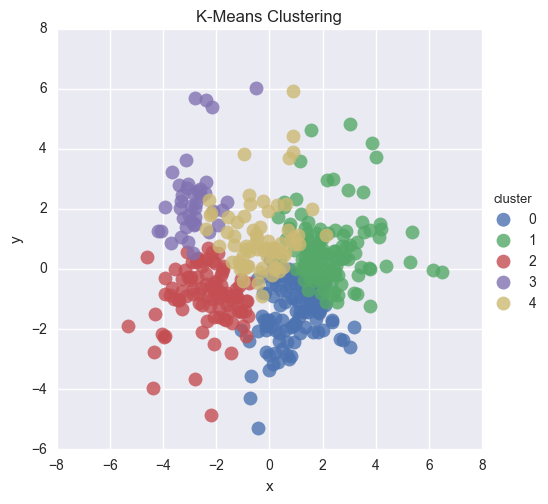

In [87]:
sns.lmplot('x', 'y',
           data=good_data,
           fit_reg=False,
           hue="cluster",  
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('K-Means Clustering')

In [88]:
good_data.head()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,x,y,cluster
0,0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,-1.757983,0.009711,2
1,1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,-1.788665,-0.812251,2
2,2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,-1.883353,-1.599135,2
3,3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1.155265,-1.405201,0
4,4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,-0.784786,-2.394294,0


In [89]:
good_data['is_0'] = good_data.cluster==0
good_data['is_1'] = good_data.cluster==1
good_data['is_2'] = good_data.cluster==2
good_data['is_3'] = good_data.cluster==3
good_data['is_4'] = good_data.cluster==4

In [95]:
good_data.columns

Index(['index', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'x', 'y', 'cluster', 'is_0', 'is_1', 'is_2', 'is_3',
       'is_4'],
      dtype='object')

In [109]:
data.join(good_data.iloc[:,7:].reset_index())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,index,x,y,cluster,is_0,is_1,is_2,is_3,is_4
0,12669,9656,7561,214,2674,1338,0.0,-1.757983,0.009711,2.0,False,False,True,False,False
1,7057,9810,9568,1762,3293,1776,1.0,-1.788665,-0.812251,2.0,False,False,True,False,False
2,6353,8808,7684,2405,3516,7844,2.0,-1.883353,-1.599135,2.0,False,False,True,False,False
3,13265,1196,4221,6404,507,1788,3.0,1.155265,-1.405201,0.0,True,False,False,False,False
4,22615,5410,7198,3915,1777,5185,4.0,-0.784786,-2.394294,0.0,True,False,False,False,False
5,9413,8259,5126,666,1795,1451,5.0,-1.085043,-0.324315,2.0,False,False,True,False,False
6,12126,3199,6975,480,3140,545,6.0,-1.128640,0.262863,4.0,False,False,False,False,True
7,7579,4956,9426,1669,3321,2566,7.0,-1.567236,-0.901014,2.0,False,False,True,False,False
8,5963,3648,6192,425,1716,750,8.0,-0.863567,0.664968,4.0,False,False,False,False,True
9,6006,11093,18881,1159,7425,2098,9.0,-2.873382,-0.677438,2.0,False,False,True,False,False


In [90]:
good_data.groupby("is_0").mean()[data.columns]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
is_0,,,,,,
False,8.480363,8.170548,8.550568,6.912358,6.992529,6.492547
True,9.612580,8.003777,8.193345,8.542592,6.227243,7.290583


In [91]:
good_data.groupby("is_1").mean()[data.columns]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
is_1,,,,,,
False,8.812274,8.489782,8.841295,7.331863,7.491840,6.872675
True,8.644161,7.157479,7.436544,7.305094,4.937757,6.215286


In [92]:
good_data.groupby("is_2").mean()[data.columns]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
is_2,,,,,,
False,8.680994,7.828817,8.145608,7.338078,6.265720,6.450797
True,9.061293,9.158489,9.542172,7.278258,8.632867,7.531867


In [93]:
good_data.groupby("is_3").mean()[data.columns]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
is_3,,,,,,
False,9.024145,8.051899,8.351243,7.479330,6.608559,6.722719
True,6.224116,8.883579,9.536542,5.796659,8.679695,6.414196


In [94]:
good_data.groupby("is_4").mean()[data.columns]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
is_4,,,,,,
False,8.782421,8.136265,8.457308,7.504978,6.723663,6.912729
True,8.683125,8.086526,8.475768,6.367822,7.198662,5.535986
